In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import sklearn

import numpy as np

In [2]:
data = pd.read_csv("Breast_cancer_data.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [5]:
data.shape

(569, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
features = data.iloc[:, :-1]
predictions = data.iloc[:, -1]

In [8]:
features.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [9]:
predictions.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=42, shuffle=True)

In [12]:
Train_data = pd.concat([X_train, y_train], axis = 'columns')
Train_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,1
181,1.977508,1.694187,2.089619,1.866047,1.262455,0
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,1
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925,1
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,1


In [13]:
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_radius,455.0,-0.002743,1.004222,-1.827998,-0.687965,-0.234963,0.458032,3.971288
mean_texture,455.0,-0.024345,0.992728,-2.229249,-0.725963,-0.141869,0.534144,4.651889
mean_perimeter,455.0,-0.003575,1.001829,-1.814389,-0.694839,-0.246689,0.485260,3.976130
mean_area,455.0,-0.001455,1.009495,-1.377937,-0.667195,-0.293480,0.320561,5.250529
mean_smoothness,455.0,-0.043856,0.990837,-3.112085,-0.749748,-0.123848,0.582825,4.770911
diagnosis,455.0,0.628571,0.483719,0.000000,0.000000,1.000000,1.000000,1.000000


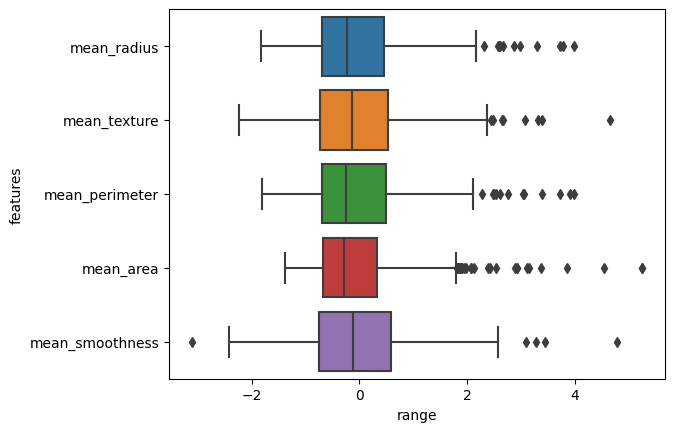

In [14]:
import seaborn as sns

sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

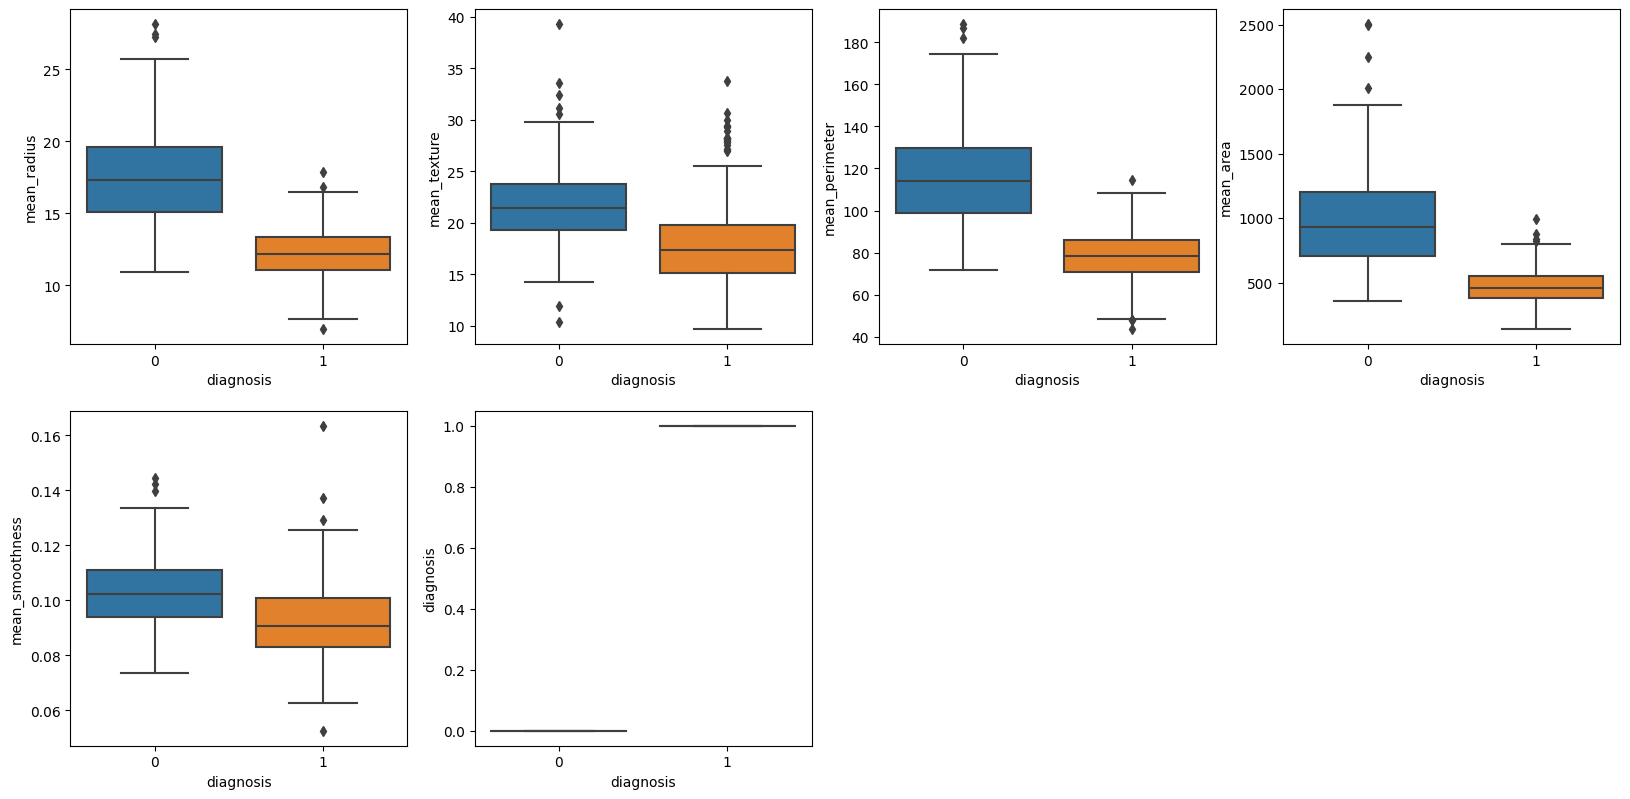

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
for i,ax in enumerate(axes.flat):
    if i<6:
        sns.boxplot(data=data, x='diagnosis', y=data.columns[i], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

In [18]:
classes, count = np.unique(y_train, return_counts=True)
count

array([169, 286], dtype=int64)

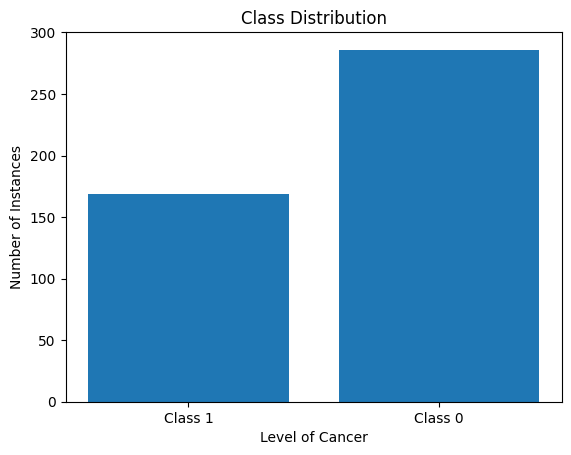

In [19]:
plt.bar(['Class 1', 'Class 0'], count)
plt.title('Class Distribution')
plt.xlabel('Level of Cancer')
plt.ylabel('Number of Instances')
plt.show()

In [20]:
corr_mat = Train_data.corr(method='pearson')
corr_mat

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.306881,0.997850,0.986609,0.173051,-0.718073
mean_texture,0.306881,1.000000,0.313124,0.300314,0.009475,-0.416213
mean_perimeter,0.997850,0.313124,1.000000,0.985985,0.210092,-0.731859
mean_area,0.986609,0.300314,0.985985,1.000000,0.180709,-0.695171
mean_smoothness,0.173051,0.009475,0.210092,0.180709,1.000000,-0.375137
diagnosis,-0.718073,-0.416213,-0.731859,-0.695171,-0.375137,1.000000


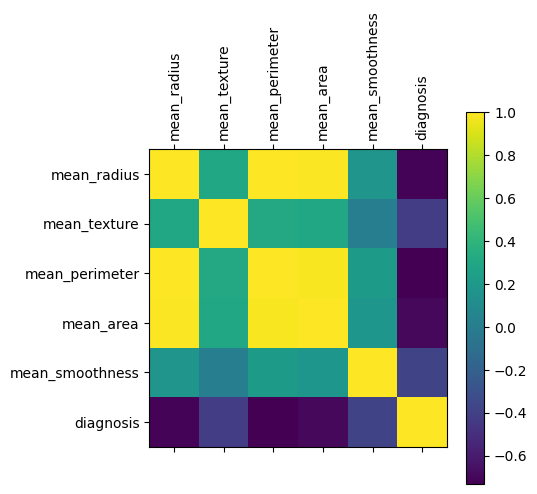

In [21]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.93
Train confusion matrix: 
 [[150  19]
 [ 13 273]]
Test Accuracy:  0.939
Test confusion matrix: 
 [[39  4]
 [ 3 68]]


In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  1.0
Train confusion matrix: 
 [[169   0]
 [  0 286]]
Test Accuracy:  0.904
Test confusion matrix: 
 [[40  3]
 [ 8 63]]


In [42]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=4)

model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred = model1.predict(X_test)

In [43]:
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.934
Train confusion matrix: 
 [[158  11]
 [ 19 267]]
Test Accuracy:  0.912
Test confusion matrix: 
 [[40  3]
 [ 7 64]]


In [ ]:
import graphviz # have to install module to further investigate